In [62]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

In [63]:
np.__version__

'1.25.2'

In [64]:
pd.__version__

'2.1.0'

In [65]:
df = pd.read_csv("data/data.csv")
df.head()

,CaseNumber,LastName,PostCode,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,431-06-4243,Richard,99847,40.0,M,ATA,140,289,0,0,172,N,0.0,Up,0
1,415-39-7809,Sheppard,64192,49.0,F,NAP,160,180,0,0,156,N,1.0,Flat,1
2,517-18-4618,Howard,29132,37.0,M,ATA,130,283,0,1,98,N,0.0,Up,0
3,634-33-8726,Taylor,12930,48.0,F,ASY,138,214,0,0,108,Y,1.5,Flat,1
4,151-40-1619,Mcgrath,79393,54.0,M,NAP,150,195,0,0,122,N,0.0,Up,0



Remove irrelevant columns (CaseNumber, LastName, PostCode) from the dataset 

In [66]:
df = df.drop(columns=["CaseNumber", "LastName", "PostCode"])
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40.0,M,ATA,140,289,0,0,172,N,0.0,Up,0
1,49.0,F,NAP,160,180,0,0,156,N,1.0,Flat,1
2,37.0,M,ATA,130,283,0,1,98,N,0.0,Up,0
3,48.0,F,ASY,138,214,0,0,108,Y,1.5,Flat,1
4,54.0,M,NAP,150,195,0,0,122,N,0.0,Up,0


In [67]:
# Replace values to numeric values so that they can be summed up later
df["HeartDisease"] = df["HeartDisease"].str.replace("yes", "1")
df["HeartDisease"] = df["HeartDisease"].str.replace("no", "0")
df["HeartDisease"] = df["HeartDisease"].astype(int)
print(df["HeartDisease"].unique())

[0 1]


<Figure size 640x480 with 0 Axes>

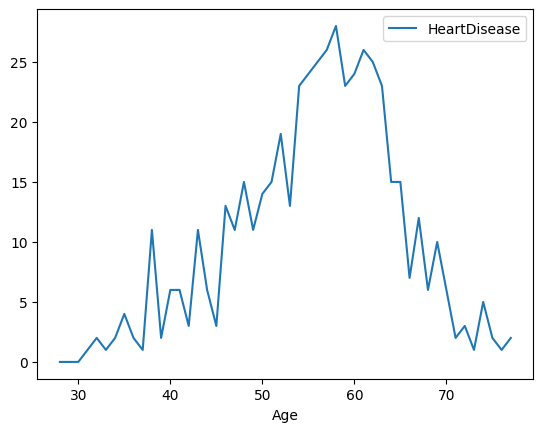

In [70]:
plt.figure()
df[["Age", "HeartDisease"]].groupby("Age").agg("sum").reset_index().plot(x = "Age", y="HeartDisease", kind = "line")
plt.show()

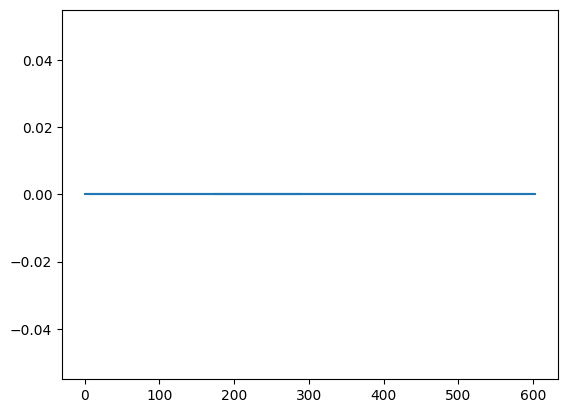

In [69]:
# cholestorol 

hearthDiseaseTrue = df["HeartDisease"].eq('1') 
plt.plot(df["Cholesterol"], hearthDiseaseTrue)  # Plot the chart
plt.show()  # display